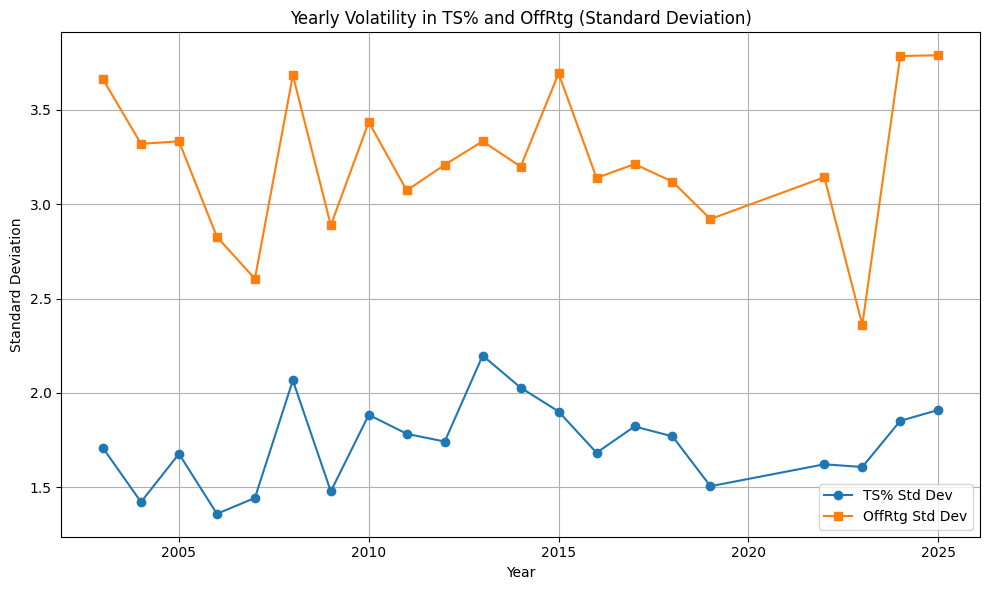

,Year,TS_PCT_Std,OffRtg_Std
16,2019,1.506236,2.920723
17,2022,1.622277,3.142159
18,2023,1.607901,2.359965
19,2024,1.852395,3.783789
20,2025,1.909938,3.787857


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the necessary data after reset
team_stats_path = '/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv'

# Load data
df = pd.read_csv(team_stats_path)

# Ensure year is integer and clean POSSESSION column if needed
df['Year'] = df['Year'].astype(int)

# Drop 2020 due to COVID outlier
df = df[df['Year'] != 2020]

# Group by year and calculate standard deviation of TS% and OffRtg
ts_std = df.groupby('Year')['TS_PCT'].std().reset_index(name='TS_PCT_Std')
off_std = df.groupby('Year')['OffRtg'].std().reset_index(name='OffRtg_Std')

# Merge for combined plot
combined_std = pd.merge(ts_std, off_std, on='Year')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(combined_std['Year'], combined_std['TS_PCT_Std'], marker='o', label='TS% Std Dev')
plt.plot(combined_std['Year'], combined_std['OffRtg_Std'], marker='s', label='OffRtg Std Dev')
plt.title('Yearly Volatility in TS% and OffRtg (Standard Deviation)')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

combined_std.tail()
